In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram , linkage, cut_tree
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
df = pd.read_csv("../Datasets/DATA_3.01_CREDIT.csv")
df.head(2)

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.89,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.03,483,3,82,15,Female,Yes,Yes,Asian,903


# Explore

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     300 non-null    float64
 1   Rating     300 non-null    int64  
 2   Cards      300 non-null    int64  
 3   Age        300 non-null    int64  
 4   Education  300 non-null    int64  
 5   Gender     300 non-null    object 
 6   Student    300 non-null    object 
 7   Married    300 non-null    object 
 8   Ethnicity  300 non-null    object 
 9   Balance    300 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 23.6+ KB


In [5]:
df.describe()

,Income,Rating,Cards,Age,Education,Balance
count,300.00,300.00,300.00,300.00,300.00,300.00
mean,44.05,348.12,3.03,54.98,13.39,502.69
std,33.86,150.87,1.35,17.22,3.08,466.99
min,10.35,93.00,1.00,24.00,5.00,0.00
25%,21.03,235.00,2.00,41.00,11.00,15.75
50%,33.12,339.00,3.00,55.00,14.00,433.50
75%,55.98,433.00,4.00,69.00,16.00,857.75
max,186.63,949.00,8.00,91.00,20.00,"1,809.00"


In [6]:
# Summary statistics for object dtypes:
df.describe(include=['object'])

,Gender,Student,Married,Ethnicity
count,300,300,300,300
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,168,268,183,141


In [7]:
# As we can see from above our object variables are actually categorical
# So let's convert them to the right type
cols = ['Gender', 'Student', 'Married', 'Ethnicity']
for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Income     300 non-null    float64 
 1   Rating     300 non-null    int64   
 2   Cards      300 non-null    int64   
 3   Age        300 non-null    int64   
 4   Education  300 non-null    int64   
 5   Gender     300 non-null    category
 6   Student    300 non-null    category
 7   Married    300 non-null    category
 8   Ethnicity  300 non-null    category
 9   Balance    300 non-null    int64   
dtypes: category(4), float64(1), int64(5)
memory usage: 15.9 KB


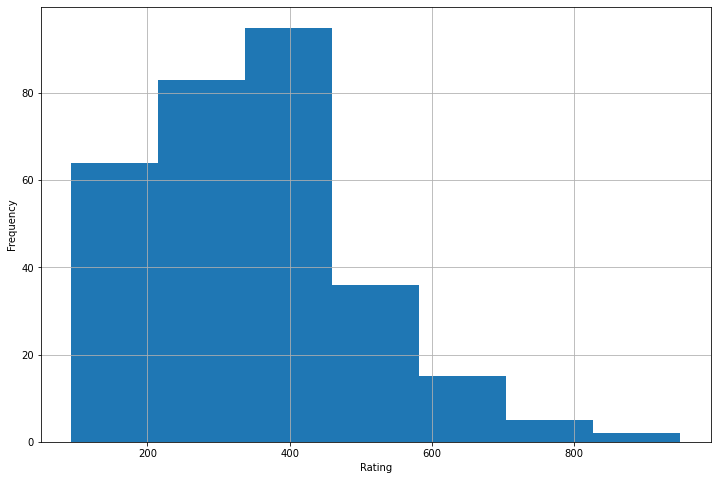

In [8]:
df['Rating'].hist(bins=7)
plt.ylabel('Frequency')
plt.xlabel('Rating');

In [9]:
# Compute the correlation between all the numerical variables of the sample
# without considering object data
df.select_dtypes(exclude='category').corr()

,Income,Rating,Cards,Age,Education,Balance
Income,1.00,0.77,0.03,0.12,-0.07,0.43
Rating,0.77,1.00,0.10,0.04,-0.10,0.86
Cards,0.03,0.10,1.00,0.05,0.02,0.12
Age,0.12,0.04,0.05,1.00,-0.05,-0.05
Education,-0.07,-0.10,0.02,-0.05,1.00,-0.07
Balance,0.43,0.86,0.12,-0.05,-0.07,1.00


The output of the correlation function provides us with numbers that do not really tell us which variables are most important, or significant in predicting the credit score. We do not know either how they
contribute to that score

--> Use correlation for a quick and simple summary of the direction and strength of the relationship between two or more numeric variables.

--> Use regression when you’re looking to predict, optimize, or explain a number response between the variables (how x influences y)

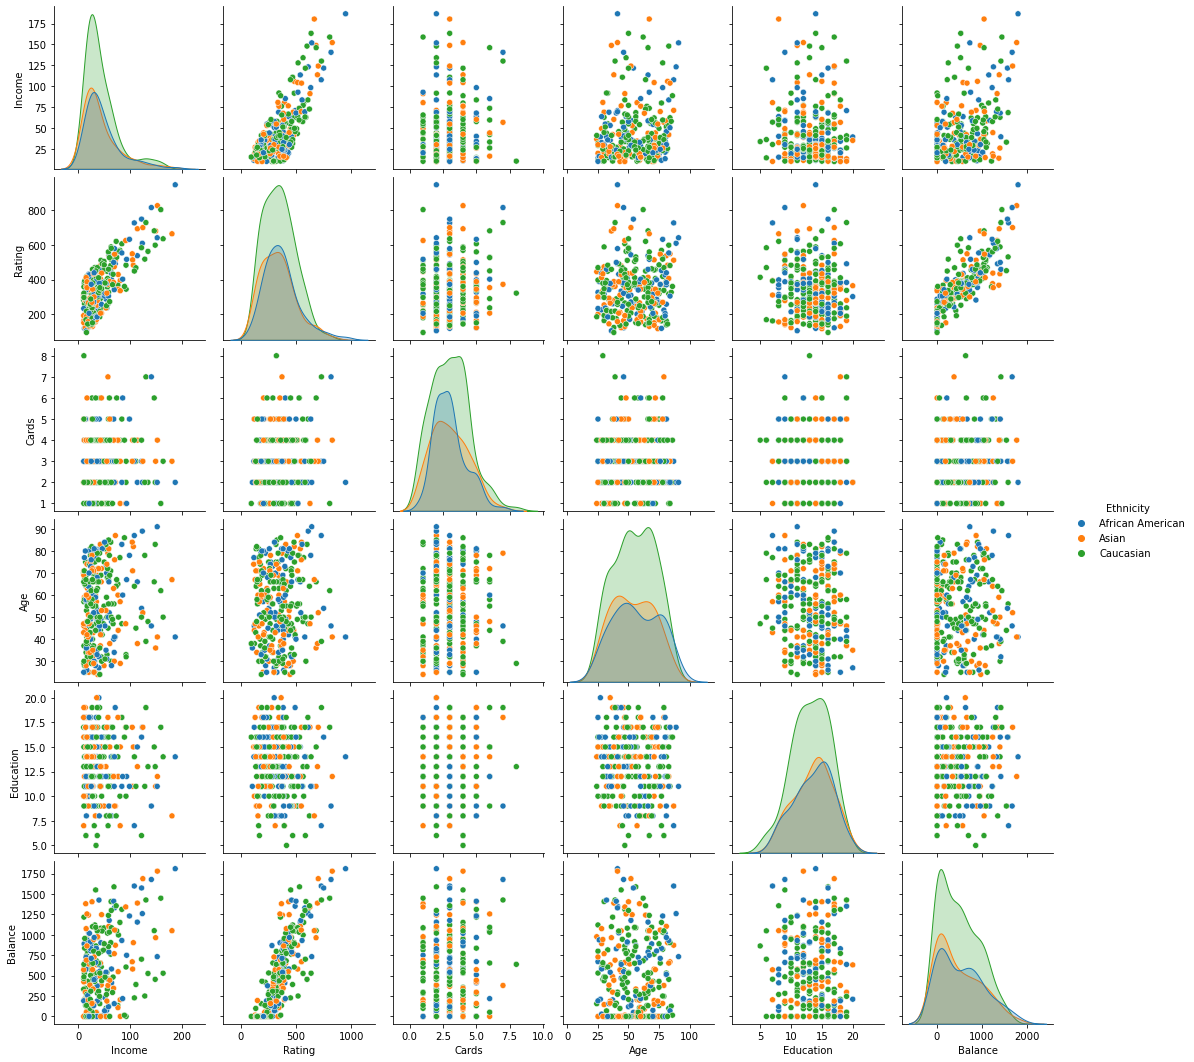

In [10]:
sns.pairplot(df, hue='Ethnicity');

# Linear Regression Model

In [11]:
# Transform the data 
Y = df.iloc[:, 1]
X = df.copy()
X.pop('Rating')
X = pd.get_dummies(X, drop_first=True, columns=['Gender', 'Student', 'Married'])
X['Ethnicity'].replace(['Caucasian', 'African American', 'Asian'], [0, 1, 2], inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Income         300 non-null    float64
 1   Cards          300 non-null    int64  
 2   Age            300 non-null    int64  
 3   Education      300 non-null    int64  
 4   Ethnicity      300 non-null    int64  
 5   Balance        300 non-null    int64  
 6   Gender_Female  300 non-null    uint8  
 7   Student_Yes    300 non-null    uint8  
 8   Married_Yes    300 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 15.1 KB


In [12]:
linreg = LinearRegression()
linreg.fit(X, Y)

LinearRegression()

In [13]:
df.head()

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.89,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.03,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.59,514,4,71,11,Male,No,No,Asian,580
3,148.92,681,3,36,11,Female,No,No,Asian,964
4,55.88,357,2,68,16,Male,No,Yes,Caucasian,331
